# Trying with One Node Model (Factor Analysis)

In [3]:
%matplotlib inline

import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(base_dir)

from Models.LatentFactorModels import *
from Simulators.Simulator import Simulator
from Models.ModelComparer import ModelComparer
import numpy as np
np.random.seed(seed=100)

Make model to simulate from

In [4]:

(m, p_0) = (2,5)
genModel = OneNodeGaussianModel(m,p_0)

Parameters $\mathbf{W}, \mathbf{\Psi}$ set randomly with element-wise mean 2 for $\mathbf{W}$; 100 EM rounds, 10 samples simulated. 

In [5]:
genModel.initializeParameters(psiMean = 2, wMean=2)

[(None, array([[ 1.,  0.],
         [ 0.,  1.]])), (array([[ 0.25023453,  2.3426804 ],
         [ 3.1530358 ,  1.74756396],
         [ 2.98132079,  2.51421884],
         [ 2.22117967,  0.92995667],
         [ 1.81050417,  2.25500144]]),
  array([[ 1.98646196,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  3.44227709,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  3.92297112,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  2.49977206,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  2.01327424]]))]

Create simulator and generate 10 samples

In [6]:
simulator = Simulator(genModel)
simulator.simulate(100)

Make model to fit and compare with original

In [8]:
fitModel = OneNodeGaussianModel(m, p_0)
fitModel.fit(genModel.getObservedData(), num_EM_rounds = 10)

Parameters not initialized before fitting; initializing Ws and Ψs
Beginning 10 EM rounds...2 (ℓ(θ)=-1543.8)...3 (ℓ(θ)=-1297.3)...4 (ℓ(θ)=-1250.0)...5 (ℓ(θ)=-1217.6)...6 (ℓ(θ)=-1202.9)...7 (ℓ(θ)=-1195.9)...8 (ℓ(θ)=-1192.1)...9 (ℓ(θ)=-1189.7)...10 (ℓ(θ)=-1188.1)...11 (ℓ(θ)=-1186.8)...done.


Compare fit to generated 

In [9]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

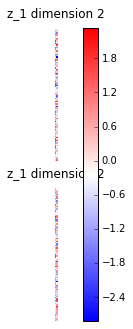

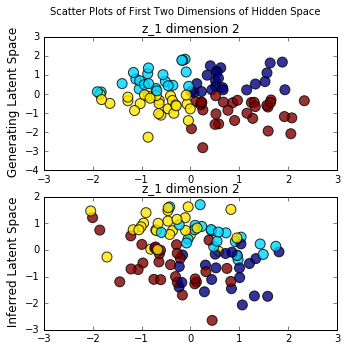

In [10]:
comparer = ModelComparer(genModel, fitModel)
comparer.compareLatent()

Seems to show rough spatial correspondence with $\vec{z}_2$ and also $\vec{z}_1$. In general, seem like the components are closer together in value, and have a higher value for $\vec{z}_2$. 

Now, parameters

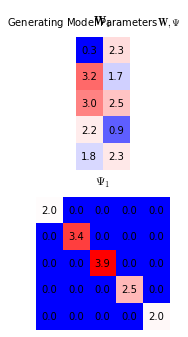

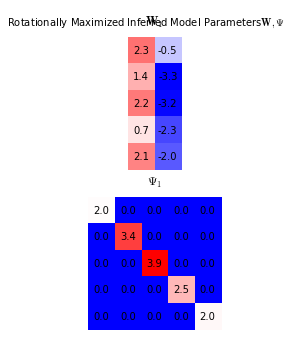

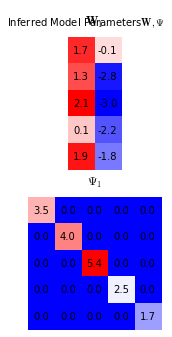

In [11]:
comparer.compareParameters()

⇒ Also blows up. 

# Compare this to [implemented factor analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis.transform) from `sklearn`.

In [12]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
faFit = fa.fit(genModel.getObservedData(), set)
latent= faFit.transform(genModel.getObservedData())

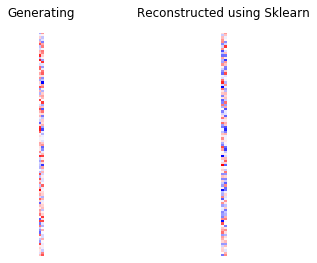

In [13]:
import matplotlib.pyplot as plt
(fig, axes) = plt.subplots(1,2)
comparer._heatmapOfMatrix(genModel.dataTree.paramData.data.as_matrix(), axes[0], title="Generating")
comparer._heatmapOfMatrix(latent, axes[1], title="Reconstructed using Sklearn")
plt.show()

AttributeError: 'ModelComparer' object has no attribute 'assign_group'

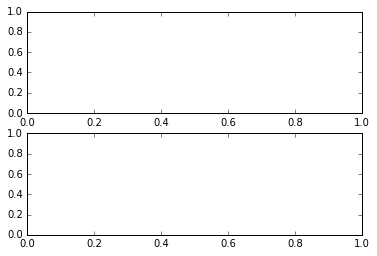

In [15]:
(fig, axes) = plt.subplots(2,1)
colors = comparer.assign_group(genModel.dataTree.paramData.data.T.as_matrix(), 4)

axes[1].scatter(latent[:,0], latent[:,1], s= 100, alpha=0.8, c=colors)
axes[1].set_title("recovered")

axes[0].scatter(genModel.dataTree.paramData.data.as_matrix()[:,0],
                genModel.dataTree.paramData.data.as_matrix()[:,1], s= 100, alpha=0.8, c=colors)
axes[0].set_title("generating")
fig.set_size_inches(5.125, 9.25)   
plt.show()

⇒ looks relatively good, but not great. Try parameters: 

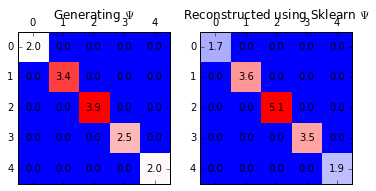

In [12]:
(fig, axes) = plt.subplots(1,2)
comparer._heatmapOfMatrix(genModel.dataTree.left.paramData.Psi, axes[0], title="Generating $\mathbf{\Psi}$")
comparer._heatmapOfMatrix(np.diagflat(faFit.noise_variance_), axes[1], title="Reconstructed using Sklearn $\mathbf{\Psi}$")
plt.show()